# Regression Models

## Imports

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from yellowbrick.regressor import PredictionError

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nbimporter

import RegTrainTestEvalSplit as reg

## Import File

In [2]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/Full.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")

full_df.head()

,Date,Hour,Nieuwmarkt Arrivals,Nieuwezijds Kolk Arrivals,Dam Arrivals,Spui Arrivals,Nieuwmarkt Departures,Nieuwezijds Kolk Departures,Dam Departures,Spui Departures,...,SensorLatitude,CrowdednessCount,is_event,Year,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos
0,2018-03-11,2400,77.0,38.0,187.0,40.0,198.0,63.0,411.0,87.0,...,6,0,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-2.449294e-16,1.000000
1,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,0,21,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-7.071068e-01,0.707107
2,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,9,88,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-7.071068e-01,0.707107
3,2018-03-11,2100,136.0,80.0,409.0,40.0,211.0,119.0,858.0,94.0,...,2,49,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-7.071068e-01,0.707107
4,2018-03-11,2200,116.0,64.0,288.0,21.0,210.0,103.0,732.0,98.0,...,8,2900,0.0,2018,1.0,6.123234e-17,0.188227,0.982126,-5.000000e-01,0.866025


## Train/Test/Eval split

In [3]:
size = 0.9
split_date = pd.Timestamp(2018, 12, 31)
sensor = "GAWW-02"
eval_start_date = pd.Timestamp(2019, 1, 1)
eval_end_date = pd.Timestamp(2019, 1, 31)

In [4]:
x_train, y_train, x_test, y_test, x_test_series, y_test_series, feature_labels = reg.trainTestSplit(full_df, size, split_date, sensor)

In [5]:
x_eval, y_eval, x_eval_series, y_eval_series = reg.evalSplit(full_df, split_date, sensor, eval_start_date, eval_end_date)

## Models

### Baseline: Linear Regression
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

#### Training

In [6]:
base = LinearRegression(n_jobs=10, normalize=True)
base.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=True)

#### Test

R^2 Score:  0.3284402553322785
RMSE:  848.6575799263707


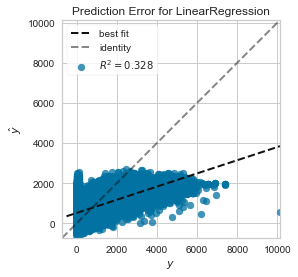

In [7]:
test_base_score = base.score(x_test, y_test)

y_pred_test_base = base.predict(x_test)
test_base_mse = mean_squared_error(y_pred_test_base, y_test)

print("R^2 Score: ", test_base_score)
print("RMSE: ", np.sqrt(test_base_mse))

visualizer = PredictionError(base)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

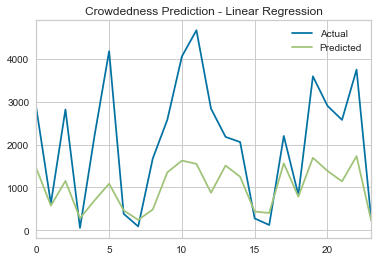

In [21]:
#Time series
time_pred_test_base = base.predict(x_test_series)

time_pred_series_test_base = pd.Series(time_pred_test_base)
time_real_series_test_base = pd.Series(y_test_series)

time_real_series_test_base.plot(legend=True, label="Actual")
time_pred_series_test_base.plot(legend=True, title='Crowdedness Prediction - Linear Regression', label="Predicted")
plt.show()

#### Evaluation

R^2 Score:  0.2544406739516635
RMSE:  678.6736582406187


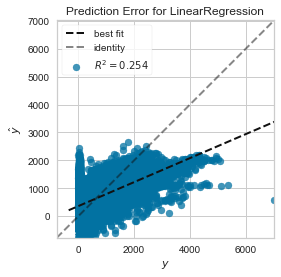

In [10]:
eval_base_score = base.score(x_eval, y_eval)

y_pred_eval_base = base.predict(x_eval)
eval_base_mse = mean_squared_error(y_pred_eval_base, y_eval)

print("R^2 Score: ", eval_base_score)
print("RMSE: ", np.sqrt(eval_base_mse))

visualizer = PredictionError(base)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_eval, y_eval)  # Evaluate the model on the test data
g = visualizer.poof() 

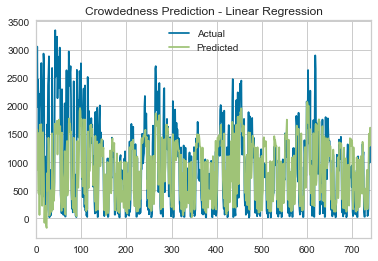

In [22]:
#Time series
time_pred_eval_base = base.predict(x_eval_series)

time_pred_series_eval_base = pd.Series(time_pred_eval_base)
time_real_series_eval_base = pd.Series(y_eval_series)

time_real_series_eval_base.plot(legend=True, label="Actual")
time_pred_series_eval_base.plot(legend=True, title='Crowdedness Prediction - Linear Regression', label="Predicted")
plt.show()

### Random Forrest Regressor 
Implemented the [Sklearn Version](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

#### Training

In [16]:
rfg = RandomForestRegressor(n_estimators=500, criterion="mse", n_jobs=100, random_state=42, bootstrap=True, 
                               oob_score=True)

rfg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=100,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

#### Test

R^2 Score:  0.9925174631822086
RMSE:  89.5807301857503


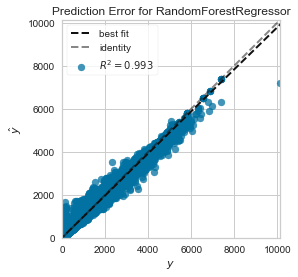

In [17]:
test_rfg_score = rfg.score(x_test, y_test)

y_pred_test_rfg = rfg.predict(x_test)
test_rfg_mse = mean_squared_error(y_pred_test_rfg, y_test)

print("R^2 Score: ", test_rfg_score)
print("RMSE: ", np.sqrt(test_rfg_mse))

visualizer = PredictionError(rfg)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

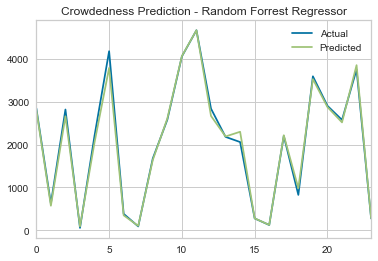

In [23]:
#Time series
time_pred_test_rfg = rfg.predict(x_test_series)

time_pred_series_test_rfg = pd.Series(time_pred_test_rfg)
time_real_series_test_rfg = pd.Series(y_test_series)

time_real_series_test_rfg.plot(legend=True, label="Actual")
time_pred_series_test_rfg.plot(legend=True, title='Crowdedness Prediction - Random Forrest Regressor', label="Predicted")
plt.show()

#### Evaluation

R^2 Score:  0.5192039482961873
RMSE:  545.004810674021


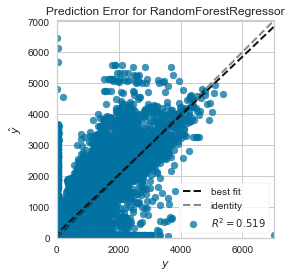

In [20]:
eval_rfg_score = rfg.score(x_eval, y_eval)

y_pred_eval_rfg = rfg.predict(x_eval)
eval_rfg_mse = mean_squared_error(y_pred_eval_rfg, y_eval)

print("R^2 Score: ", eval_rfg_score)
print("RMSE: ", np.sqrt(eval_rfg_mse))

visualizer = PredictionError(rfg)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_eval, y_eval)  # Evaluate the model on the test data
g = visualizer.poof() 

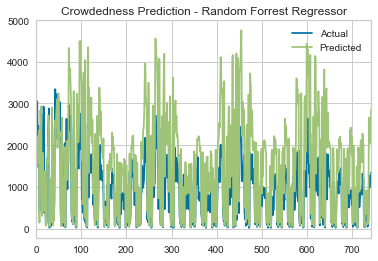

In [24]:
#Time series
time_pred_eval_rfg = rfg.predict(x_eval_series)

time_pred_series_eval_rfg = pd.Series(time_pred_eval_rfg)
time_real_series_eval_rfg = pd.Series(y_eval_series)

time_real_series_eval_rfg.plot(legend=True, label="Actual")
time_pred_series_eval_rfg.plot(legend=True, title='Crowdedness Prediction - Random Forrest Regressor', label="Predicted")
plt.show()